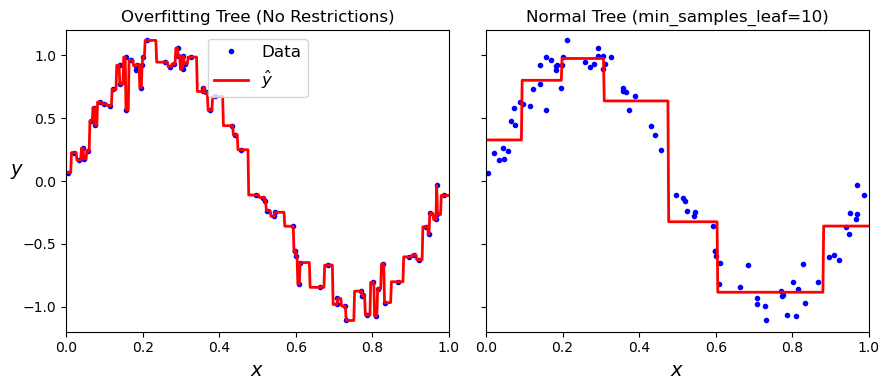

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# Generate random regression data
np.random.seed(42)
X = np.sort(np.random.rand(80, 1), axis=0)
y = np.sin(2 * np.pi * X).ravel() + np.random.normal(0, 0.1, X.shape[0])  # Add noise

# High-resolution test data for smooth curves
x1 = np.linspace(0, 1, 500).reshape(-1, 1)

# 1. Overfitting tree (no restriction)
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg1.fit(X, y)
y_pred1 = tree_reg1.predict(x1)

# 2. Normal tree (prevent overfitting using min_samples_leaf)
tree_reg2 = DecisionTreeRegressor(min_samples_leaf=10, random_state=42)
tree_reg2.fit(X, y)
y_pred2 = tree_reg2.predict(x1)

# Plotting both
fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)

plt.sca(axes[0])
plt.plot(X, y, "b.", label="Data")
plt.plot(x1, y_pred1, "r-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -1.2, 1.2])
plt.xlabel("$x$", fontsize=14)
plt.ylabel("$y$", fontsize=14, rotation=0)
plt.legend(loc="upper center", fontsize=12)
plt.title("Overfitting Tree (No Restrictions)", fontsize=12)

plt.sca(axes[1])
plt.plot(X, y, "b.", label="Data")
plt.plot(x1, y_pred2, "r-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -1.2, 1.2])
plt.xlabel("$x$", fontsize=14)
plt.title(f"Normal Tree (min_samples_leaf={tree_reg2.min_samples_leaf})", fontsize=12)

plt.tight_layout()
plt.show()
